In [1]:
!python data_gen/env.py --env_id ShapesTrain-v0 --fname data/shapes_train.h5 --num_episodes 10 --seed 1
!python data_gen/env.py --env_id ShapesEval-v0 --fname data/shapes_eval.h5 --num_episodes 100 --seed 2

INFO: Making new env: ShapesTrain-v0
iter 0
INFO: Making new env: ShapesEval-v0
iter 0
iter 10
iter 20
iter 30
iter 40
iter 50
iter 60
iter 70
iter 80
iter 90


In [2]:
!python train.py --dataset data/shapes_train.h5 --encoder small --name shapes --epochs 2

Starting model training...
Epoch: 1 [0/1000 (0%)]	Loss: 0.001106
====> Epoch: 1 Average loss: 0.001106
Epoch: 2 [0/1000 (0%)]	Loss: 0.015802
====> Epoch: 2 Average loss: 0.015802


### Slot Attention dev

In [4]:
!python train_slot_attn.py --dataset data/shapes_train.h5 --encoder small --name shapes --epochs 1 --use_slot_attn

Starting model training...
Epoch: 1 [0/1000 (0%)]	Loss: 0.001941
====> Epoch: 1 Average loss: 0.001941


In [14]:
!python train_slot_attn.py --dataset data/shapes_train.h5 --encoder small --name shapes --epochs 1

Starting model training...
Epoch: 1 [0/1000 (0%)]	Loss: 0.001106
====> Epoch: 1 Average loss: 0.001106


In [9]:
!python eval_slot_attn.py --dataset data/shapes_eval.h5 --save-folder checkpoints/shapes --num-steps 1

Processed 1 batches of size 100
Size of current topk evaluation batch: 100
Hits @ 1: 0.01
MRR: 0.05184808507173358


In [45]:
!python train.py --dataset data/mmnist_eval.h5 --encoder small --name mmnist --epochs 2 --ignore-action

Namespace(action_dim=4, batch_size=1024, copy_action=False, cuda=False, dataset='data/mmnist_eval.h5', decoder=False, embedding_dim=2, encoder='small', epochs=2, hidden_dim=512, hinge=1.0, ignore_action=True, learning_rate=0.0005, log_interval=20, name='mmnist', no_cuda=False, num_objects=5, save_folder='checkpoints', seed=42, sigma=0.5)
^C
Traceback (most recent call last):
  File "train.py", line 100, in <module>
    hdf5_file=args.dataset)
  File "/Users/zeba/Desktop/POC/c-swm/utils.py", line 137, in __init__
    self.experience_buffer = load_list_dict_h5py(hdf5_file)
  File "/Users/zeba/Desktop/POC/c-swm/utils.py", line 66, in load_list_dict_h5py
    array_dict[i][key] = hf[grp][key][:]
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "/anaconda3/envs/c-swm/lib/python3.6/site-packages/h5py/_hl/dataset.py", line 531, in __getitem__
    if numpy.product(self.shape, dtype=numpy.ulongl

torch.Size([1024, 1, 64, 64])


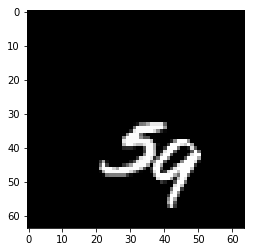

In [39]:
import utils
from torch.utils import data
dataset = utils.StateTransitionsDataset(
    hdf5_file="data/mmnist_eval.h5")
train_loader = data.DataLoader(
    dataset, batch_size=1024, shuffle=True, num_workers=4)
from matplotlib import pyplot as plt
obs = train_loader.__iter__().next()
print(obs[2].shape)
plt.imshow(obs[0][0,0], cmap="gray")

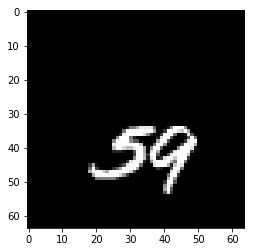

In [40]:
plt.imshow(obs[2][0,0], cmap="gray")

In [17]:
obs[0].shape

torch.Size([1024, 64])

In [18]:
from utils import load_list_dict_h5py
dataset_h5 = load_list_dict_h5py("data/mmnist_eval.h5")

In [22]:
dataset_h5[0]['obs'].shape

(64, 64)

In [30]:
import numpy as np
mmnist_dataset = np.load("../singularity-vm/datasets/mnist_test_seq.npy")
mmnist_dataset.shape

(20, 10000, 64, 64)

In [32]:
mmnist_dataset_rs = mmnist_dataset.reshape((20, 10000, 1, 64, 64))

In [33]:
mmnist_dataset_rs.shape

(20, 10000, 1, 64, 64)

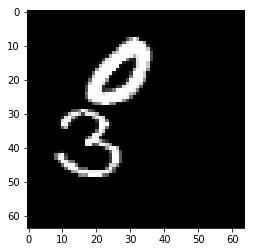

In [37]:
plt.imshow(mmnist_dataset_rs[1, 1, 0], cmap="gray")

In [63]:
!python train_and_eval.py --dataset data/shapes_train.h5 --encoder small --name shapes --epochs 2 --num-reps 2

Repetition 0
Inside train_c_swm
About to get dataset
Dataset loaded
Starting model training...
Epoch: 1 [0/1000 (0%)]	Loss: 0.001106
Epoch: 2 [0/1000 (0%)]	Loss: 0.015802
{'batch_size': 1024, 'epochs': 2, 'learning_rate': 0.0005, 'encoder': 'small', 'sigma': 0.5, 'hinge': 1.0, 'hidden_dim': 512, 'embedding_dim': 2, 'action_dim': 4, 'num_objects': 5, 'ignore_action': False, 'copy_action': False, 'decoder': False, 'no_cuda': False, 'seed': 42, 'log_interval': 20, 'dataset': 'data/shapes_train.h5', 'name': 'shapes', 'save_folder': 'checkpoints', 'num_steps': 1, 'dataset_eval': 'data/shapes_eval.h5', 'num_reps': 2, 'num_workers': 4, 'results_file': 'results_c_swm.txt', 'cuda': False}
Processed 1 batches of size 100
Size of current topk evaluation batch: 100
Hits @ 1: 0.02
MRR: 0.05981076824275697
{'H1': 0.02, 'MRR': tensor(0.0598, dtype=torch.float64)}
Repetition 1
Inside train_c_swm
About to get dataset
Dataset loaded
Starting model training...
Epoch: 1 [0/1000 (0%)]	Loss: 0.001114
Epoch:

### MNIST dataset

In [73]:
from torchvision import datasets, transforms
import torch
dataset1 = datasets.MNIST('./', train=True, download=True)
dataset2 = datasets.MNIST('./', train=False)

100.1%

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


113.5%

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


100.4%

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


180.4%

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


In [77]:
train_set_array = dataset1.data.numpy()
train_targets_array = dataset1.targets.numpy()
test_set_array = dataset2.data.numpy()
test_targets_array = dataset2.targets.numpy()

In [82]:
train_set_array.shape

(60000, 28, 28)

In [117]:
import random
import numpy as np
'''
Transforms an MNIST image into a 64x64 
containing the digit and the rest is 
filled with black pixels. The position of 
the digit is random
'''
def digit_to_64x64(digit_array):
    padded_digit = np.zeros((64, 64))
    x_pos = random.randint(0, 36)
    y_pos = random.randint(0, 36)
    padded_digit[x_pos:x_pos+28, y_pos:y_pos+28] = digit_array
    return padded_digit

'''
Transforms the entire MNIST using digit_to_64x64
includes the channel dimension
'''
def mnist_to_64x64(train_set_array, test_set_array, seed=1):
    random.seed(seed)
    num_train_samples = train_set_array.shape[0]
    padded_train_set_array = np.zeros((num_train_samples, 1, 64, 64))
    for i in range(num_train_samples):
        padded_train_set_array[i, 0] = digit_to_64x64(train_set_array[i])
    
    num_test_samples = test_set_array.shape[0]
    padded_test_set_array = np.zeros((num_test_samples, 1, 64, 64))
    for i in range(num_test_samples):
        padded_test_set_array[i, 0] = digit_to_64x64(test_set_array[i])
    
    return padded_train_set_array, padded_test_set_array

In [119]:
padded_train_set_array, padded_test_set_array = mnist_to_64x64(train_set_array, test_set_array, seed=1)

(60000, 1, 64, 64)


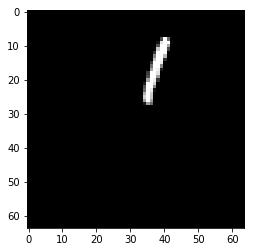

In [127]:
plt.imshow(padded_test_set_array[5,0], cmap="gray")

### Training model and evaluate on downstream task

In [131]:
#Generate MMnist dataset
!python data_gen/mmnist_gen.py --mmnist_npy_path "../singularity-vm/datasets/mnist_test_seq.npy"

In [134]:
#Train model
!python train.py --dataset data/mmnist_eval.h5 --encoder small --embedding-dim 2 --num-objects 2 --epochs 1 --name mmnist --ignore-action

Starting model training...
Epoch: 1 [0/76000 (0%)]	Loss: 0.001987
Epoch: 1 [20480/76000 (27%)]	Loss: 0.000330
Epoch: 1 [40960/76000 (53%)]	Loss: 0.000248
Epoch: 1 [61440/76000 (80%)]	Loss: 0.000235
====> Epoch: 1 Average loss: 0.000506


In [150]:
import os
import pickle
import modules

#Load trained model
save_folder = 'checkpoints/mmnist'
meta_file = os.path.join(save_folder, 'metadata.pkl')
model_file = os.path.join(save_folder, 'model.pt')
args = pickle.load(open(meta_file, 'rb'))['args']
device = torch.device('cuda' if args.cuda else 'cpu')

model = modules.ContrastiveSWM(
    embedding_dim=args.embedding_dim,
    hidden_dim=args.hidden_dim,
    action_dim=args.action_dim,
    input_dims=input_shape,
    num_objects=args.num_objects,
    sigma=args.sigma,
    hinge=args.hinge,
    ignore_action=args.ignore_action,
    copy_action=args.copy_action,
    encoder=args.encoder).to(device)

model.load_state_dict(torch.load(model_file))

<All keys matched successfully>

In [161]:
!python eval.py --dataset data/mmnist_eval.h5 --save-folder checkpoints/mmnist --num-steps 1

2
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 

2
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 

2
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 

2
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 

2
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 

2
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 

2
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 

2
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 

2
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 

2
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 

          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0

2
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 

In [188]:
repr_train = None
with torch.no_grad():
    for batch_idx, data_batch in enumerate(train_loader):
        obs = data_batch.to(device)
        obs = obs.type(torch.FloatTensor)
        state = model.obj_encoder(model.obj_extractor(obs))
        representation = torch.flatten(state, start_dim=1).numpy()
        if repr_train is None:
            repr_train = representation
        else:
            repr_train = np.concatenate((repr_train, representation))

[[ 1.7966475 -3.5783565  1.509217  -3.7107453]
 [ 1.6401412 -4.6755934  1.4271574 -4.635944 ]]
[[ 1.7966475 -3.5783565  1.509217  -3.7107453]
 [ 1.6401412 -4.6755934  1.4271574 -4.635944 ]
 [ 1.7946769 -3.7987912  1.5446411 -3.8945901]
 [ 0.3385612 -3.3474538  0.4054837 -3.5554187]]


In [189]:
from torch.utils import data
import os
import pickle
import modules

'''
Generates new dataset by applying model to modified MNIST data loader
Return the generated numpy array
'''
def generate_repr_dataset(model, data_loader):
    repr_train = None
    with torch.no_grad():
        for batch_idx, data_batch in enumerate(data_loader):
            obs = data_batch.to(device)
            obs = obs.type(torch.FloatTensor)
            state = model.obj_encoder(model.obj_extractor(obs))
            representation = torch.flatten(state, start_dim=1).numpy()
            if repr_train is None:
                repr_train = representation
            else:
                repr_train = np.concatenate((repr_train, representation))
    return repr_train


train_loader = data.DataLoader(
    padded_train_set_array, batch_size=1024, shuffle=False, num_workers=4)

test_loader = data.DataLoader(
    padded_test_set_array, batch_size=1024, shuffle=False, num_workers=4)

obs = train_loader.__iter__().next()[0]
input_shape = obs.size()

#Load trained model
save_folder = 'checkpoints/mmnist'
meta_file = os.path.join(save_folder, 'metadata.pkl')
model_file = os.path.join(save_folder, 'model.pt')
args = pickle.load(open(meta_file, 'rb'))['args']
device = torch.device('cuda' if args.cuda else 'cpu')

model = modules.ContrastiveSWM(
    embedding_dim=args.embedding_dim,
    hidden_dim=args.hidden_dim,
    action_dim=args.action_dim,
    input_dims=input_shape,
    num_objects=args.num_objects,
    sigma=args.sigma,
    hinge=args.hinge,
    ignore_action=args.ignore_action,
    copy_action=args.copy_action,
    encoder=args.encoder).to(device)

model.load_state_dict(torch.load(model_file))

train_repr_array = generate_repr_dataset(model, train_loader)
test_repr_array = generate_repr_dataset(model, test_loader)

In [190]:
train_repr_array.shape

(60000, 4)

In [191]:
test_repr_array.shape

(10000, 4)

### Linear classifier

In [194]:
!pip install sklearn

Processing /Users/zeba/Library/Caches/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074/sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-0.23.2-cp36-cp36m-macosx_10_9_x86_64.whl (7.2 MB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
     |████████████████████████████████| 301 kB 1.2 MB/s eta 0:00:01


In [211]:
import sklearn
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

# linear_model = SGDClassifier(max_iter=1000, tol=1e-3)
svd_model = LinearSVC()
linear_model.fit(train_repr_array, train_targets_array)

SGDClassifier()

In [212]:
linear_model.score(test_repr_array, test_targets_array)

0.0974

### Fine-tuning

In [219]:
from torch.utils.data import Dataset, DataLoader
class MNISTDataset(Dataset):
    def __init__(self, images, labels, transforms=None):
        self.X = images
        self.y = labels
        self.transforms = transforms
         
    def __len__(self):
        return (self.X.shape[0])
    
    def __getitem__(self, i):
        data = self.X[i]
        if self.transforms:
            data = self.transforms(data)    
        return (data, self.y[i])
        
mnist_ds = MNISTDataset(padded_train_set_array, train_targets_array)
mnist_data_loader = DataLoader(mnist_ds, batch_size=256, shuffle=True)

In [231]:
from torch import nn
"""
Fine tunes the model with a softmax head
"""
def fine_tune_mnist(model, device, data_loader,  num_classes, use_trans_model=False):
    num_ftrs = model.num_objects * model.embedding_dim
    model.class_head = nn.Linear(num_ftrs, num_classes)
    
    epochs = 20
    learning_rate = 5e-5

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    print('Start tuning model')
    model.train()
    for epoch in range(epochs):
        tuning_loss = 0
        for data in data_loader:
            obs, targets = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            
            state = model.obj_encoder(model.obj_extractor(obs))
            if use_trans_model:
                pred_trans = model.transition_model(state, np.zeros((1,1), dtype=np.int64))
                state = state + pred_trans
            state = torch.flatten(state, start_dim=1)
            outputs = model.class_head(state)
            
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
 
            tuning_loss += loss.item()
        print('[Epoch %d] loss: %.3f' %
                      (epoch + 1, tuning_loss/len(data_loader)))
 
    print('Done Tuning')
    return model

In [232]:
fine_tune_mnist(model, device, mnist_data_loader, 10)

Start tuning model


RuntimeError: Expected object of scalar type Double but got scalar type Float for argument #2 'weight'

## SimCLR loss

In [376]:
#From SimCLR
def nt_xent_loss(self, obs, action, next_obs):
    LARGE_NUM = 1e9
    temperature = 1.0
    
    objs = self.obj_extractor(obs)
    next_objs = self.obj_extractor(next_obs)

    next_state = self.obj_encoder(next_objs)
    state = self.obj_encoder(objs)
    pred_trans = self.transition_model(state, action)
    pred_state = state + pred_trans
        
    flat_pred_state = torch.flatten(pred_state, start_dim=1)
    flat_next_state = torch.flatten(next_state, start_dim=1)
    
    batch_size = flat_pred_state.size()[0]
    state_dim = flat_pred_state.size()[1]
    hidden = F.normalize(torch.cat((flat_pred_state, flat_next_state), 1), p=2, dim=1)
    hidden_1, hidden_2 = torch.split(hidden, split_size_or_sections=state_dim, dim=1)
    
    #labels = F.one_hot(torch.arange(0, batch_size), num_classes=batch_size * 2)
    labels = torch.arange(0, batch_size)
    masks = F.one_hot(torch.arange(0, batch_size), num_classes=batch_size)
    
    hidden_1_T = torch.transpose(hidden_1, 0, 1)
    hidden_2_T = torch.transpose(hidden_1, 0, 1)
    
    logits_11 = torch.matmul(hidden_1, hidden_1_T) / temperature
    logits_11 = logits_11 - masks.float() * LARGE_NUM #Forces similarity between equals to be small
    logits_22 = torch.matmul(hidden_2, hidden_2_T) / temperature
    logits_22 = logits_22 - masks.float() * LARGE_NUM #Forces similarity between equals to be small
    logits_12 = torch.matmul(hidden_1, hidden_2_T) / temperature
    logits_21 = torch.matmul(hidden_2, hidden_1_T) / temperature
    
    
    cross_entropy_loss = nn.CrossEntropyLoss()
    loss_1 = cross_entropy_loss(torch.cat((logits_12, logits_11), 1), labels)
    loss_2 = cross_entropy_loss(torch.cat((logits_21, logits_22), 1), labels)
    loss = loss_1 + loss_2
    
    return loss

In [377]:
input_str = "--dataset data/shapes_train.h5 --encoder small --name shapes --epochs 100"

In [378]:
import argparse
import torch
import utils
import datetime
import os
import pickle

import numpy as np
import logging

from torch.utils import data
import torch.nn.functional as F

import modules


parser = argparse.ArgumentParser()
parser.add_argument('--batch-size', type=int, default=1024,
                    help='Batch size.')
parser.add_argument('--epochs', type=int, default=100,
                    help='Number of training epochs.')
parser.add_argument('--learning-rate', type=float, default=5e-4,
                    help='Learning rate.')

parser.add_argument('--encoder', type=str, default='small',
                    help='Object extrator CNN size (e.g., `small`).')
parser.add_argument('--sigma', type=float, default=0.5,
                    help='Energy scale.')
parser.add_argument('--hinge', type=float, default=1.,
                    help='Hinge threshold parameter.')

parser.add_argument('--hidden-dim', type=int, default=512,
                    help='Number of hidden units in transition MLP.')
parser.add_argument('--embedding-dim', type=int, default=2,
                    help='Dimensionality of embedding.')
parser.add_argument('--action-dim', type=int, default=4,
                    help='Dimensionality of action space.')
parser.add_argument('--num-objects', type=int, default=5,
                    help='Number of object slots in model.')
parser.add_argument('--ignore-action', action='store_true', default=False,
                    help='Ignore action in GNN transition model.')
parser.add_argument('--copy-action', action='store_true', default=False,
                    help='Apply same action to all object slots.')

parser.add_argument('--decoder', action='store_true', default=False,
                    help='Train model using decoder and pixel-based loss.')

parser.add_argument('--no-cuda', action='store_true', default=False,
                    help='Disable CUDA training.')
parser.add_argument('--seed', type=int, default=42,
                    help='Random seed (default: 42).')
parser.add_argument('--log-interval', type=int, default=20,
                    help='How many batches to wait before logging'
                         'training status.')
parser.add_argument('--dataset', type=str,
                    default='data/shapes_train.h5',
                    help='Path to replay buffer.')
parser.add_argument('--name', type=str, default='none',
                    help='Experiment name.')
parser.add_argument('--save-folder', type=str,
                    default='checkpoints',
                    help='Path to checkpoints.')

args = parser.parse_args(input_str.split())
args.cuda = not args.no_cuda and torch.cuda.is_available()

now = datetime.datetime.now()
timestamp = now.isoformat()

if args.name == 'none':
    exp_name = timestamp
else:
    exp_name = args.name

np.random.seed(args.seed)
torch.manual_seed(args.seed)
if args.cuda:
    torch.cuda.manual_seed(args.seed)

exp_counter = 0
save_folder = '{}/{}/'.format(args.save_folder, exp_name)

if not os.path.exists(save_folder):
    os.makedirs(save_folder)
meta_file = os.path.join(save_folder, 'metadata.pkl')
model_file = os.path.join(save_folder, 'model.pt')
log_file = os.path.join(save_folder, 'log.txt')

logging.basicConfig(level=logging.INFO, format='%(message)s')
logger = logging.getLogger()
logger.addHandler(logging.FileHandler(log_file, 'a'))
print = logger.info

pickle.dump({'args': args}, open(meta_file, "wb"))

device = torch.device('cuda' if args.cuda else 'cpu')

dataset = utils.StateTransitionsDataset(
    hdf5_file=args.dataset)
train_loader = data.DataLoader(
    dataset, batch_size=args.batch_size, shuffle=True, num_workers=4)

# Get data sample
obs = train_loader.__iter__().next()[0]
input_shape = obs[0].size()

model = modules.ContrastiveSWM(
    embedding_dim=args.embedding_dim,
    hidden_dim=args.hidden_dim,
    action_dim=args.action_dim,
    input_dims=input_shape,
    num_objects=args.num_objects,
    sigma=args.sigma,
    hinge=args.hinge,
    ignore_action=args.ignore_action,
    copy_action=args.copy_action,
    encoder=args.encoder).to(device)


model.apply(utils.weights_init)

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=args.learning_rate)

if args.decoder:
    if args.encoder == 'large':
        decoder = modules.DecoderCNNLarge(
            input_dim=args.embedding_dim,
            num_objects=args.num_objects,
            hidden_dim=args.hidden_dim // 16,
            output_size=input_shape).to(device)
    elif args.encoder == 'medium':
        decoder = modules.DecoderCNNMedium(
            input_dim=args.embedding_dim,
            num_objects=args.num_objects,
            hidden_dim=args.hidden_dim // 16,
            output_size=input_shape).to(device)
    elif args.encoder == 'small':
        decoder = modules.DecoderCNNSmall(
            input_dim=args.embedding_dim,
            num_objects=args.num_objects,
            hidden_dim=args.hidden_dim // 16,
            output_size=input_shape).to(device)
    decoder.apply(utils.weights_init)
    optimizer_dec = torch.optim.Adam(
        decoder.parameters(),
        lr=args.learning_rate)


# Train model.
print('Starting model training...')
step = 0
best_loss = 1e9

for epoch in range(1, args.epochs + 1):
    model.train()
    train_loss = 0

    for batch_idx, data_batch in enumerate(train_loader):
        data_batch = [tensor.to(device) for tensor in data_batch]
        optimizer.zero_grad()

        if args.decoder:
            optimizer_dec.zero_grad()
            obs, action, next_obs = data_batch
            objs = model.obj_extractor(obs)
            state = model.obj_encoder(objs)

            rec = torch.sigmoid(decoder(state))
            loss = F.binary_cross_entropy(
                rec, obs, reduction='sum') / obs.size(0)

            next_state_pred = state + model.transition_model(state, action)
            next_rec = torch.sigmoid(decoder(next_state_pred))
            next_loss = F.binary_cross_entropy(
                next_rec, next_obs,
                reduction='sum') / obs.size(0)
            loss += next_loss
        else:
            loss = model.contrastive_loss(*data_batch)
            loss += nt_xent_loss(model, *data_batch)

        loss.backward()
        train_loss += loss.item()
        optimizer.step()

        if args.decoder:
            optimizer_dec.step()

        if batch_idx % args.log_interval == 0:
            print(
                'Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data_batch[0]),
                    len(train_loader.dataset),
                    100. * batch_idx / len(train_loader),
                    loss.item() / len(data_batch[0])))

        step += 1

    avg_loss = train_loss / len(train_loader.dataset)
    print('====> Epoch: {} Average loss: {:.6f}'.format(
        epoch, avg_loss))

    if avg_loss < best_loss:
        best_loss = avg_loss
        torch.save(model.state_dict(), model_file)


Starting model training...
Epoch: 1 [0/1000 (0%)]	Loss: 0.016248
====> Epoch: 1 Average loss: 0.016248
Epoch: 2 [0/1000 (0%)]	Loss: 0.026789
====> Epoch: 2 Average loss: 0.026789
Epoch: 3 [0/1000 (0%)]	Loss: 0.018099
====> Epoch: 3 Average loss: 0.018099
Epoch: 4 [0/1000 (0%)]	Loss: 0.016174
====> Epoch: 4 Average loss: 0.016174
Epoch: 5 [0/1000 (0%)]	Loss: 0.015813
====> Epoch: 5 Average loss: 0.015813
Epoch: 6 [0/1000 (0%)]	Loss: 0.015899
====> Epoch: 6 Average loss: 0.015899
Epoch: 7 [0/1000 (0%)]	Loss: 0.015713
====> Epoch: 7 Average loss: 0.015713
Epoch: 8 [0/1000 (0%)]	Loss: 0.015645
====> Epoch: 8 Average loss: 0.015645
Epoch: 9 [0/1000 (0%)]	Loss: 0.015670
====> Epoch: 9 Average loss: 0.015670
Epoch: 10 [0/1000 (0%)]	Loss: 0.015628
====> Epoch: 10 Average loss: 0.015628
Epoch: 11 [0/1000 (0%)]	Loss: 0.015550
====> Epoch: 11 Average loss: 0.015550
Epoch: 12 [0/1000 (0%)]	Loss: 0.015522
====> Epoch: 12 Average loss: 0.015522
Epoch: 13 [0/1000 (0%)]	Loss: 0.015535
====> Epoch: 13 

In [380]:
!python eval.py --dataset data/shapes_eval.h5 --save-folder checkpoints/shapes --num-steps 5

Processed 1 batches of size 100
Size of current topk evaluation batch: 100
Hits @ 1: 0.57
MRR: 0.7147063492063492


# Data Augmentation

All random

Random crop: torchvision.transforms.RandomResizedCrop

Color distorion

Gaussian blur

In [139]:
import torchvision
def get_data_augmentation(s=1.0, crop_size=50):
    # s is the strength of color distortion.
    color_jitter = torchvision.transforms.ColorJitter(0.8*s, 0.8*s, 0.8*s, 0.2*s)
    rnd_color_jitter = torchvision.transforms.RandomApply([color_jitter], p=0.8)
    rnd_gray = torchvision.transforms.RandomGrayscale(p=0.2)
    color_distort = torchvision.transforms.Compose([
        torchvision.transforms.ToPILImage(),
        torchvision.transforms.RandomResizedCrop(crop_size),
        torchvision.transforms.Resize(64),
        rnd_color_jitter,
        rnd_gray,
        torchvision.transforms.ToTensor()])
    return color_distort

In [140]:
#Create Custom dataset to apply transformations
from utils import *

class StateTransitionsDataAugDataset(data.Dataset):
    """Create dataset of (o_t, a_t, o_{t+1}) transitions from replay buffer."""

    def __init__(self, hdf5_file, transforms=None):
        """
        Args:
            hdf5_file (string): Path to the hdf5 file that contains experience
                buffer
            transforms: torchvision transforms
        """
        self.transforms = transforms
        self.experience_buffer = load_list_dict_h5py(hdf5_file)

        # Build table for conversion between linear idx -> episode/step idx
        self.idx2episode = list()
        step = 0
        for ep in range(len(self.experience_buffer)):
            num_steps = len(self.experience_buffer[ep]['action'])
            idx_tuple = [(ep, idx) for idx in range(num_steps)]
            self.idx2episode.extend(idx_tuple)
            step += num_steps

        self.num_steps = step

    def __len__(self):
        return self.num_steps

    def __getitem__(self, idx):
        ep, step = self.idx2episode[idx]
        #obs = to_float(self.experience_buffer[ep]['obs'][step])
        obs = self.experience_buffer[ep]['obs'][step]
        action = self.experience_buffer[ep]['action'][step]
        #next_obs = to_float(self.experience_buffer[ep]['next_obs'][step])
        next_obs = self.experience_buffer[ep]['next_obs'][step]
        if self.transforms:
            obs = self.transforms(obs[0])
            next_obs = self.transforms(next_obs[0])
        return obs, action, next_obs

In [141]:
transform = get_data_augmentation()
#transform =None
# transform = torchvision.transforms.Compose([
#         torchvision.transforms.ToTensor()])

#dataset = utils.StateTransitionsDataAugDataset(
dataset = StateTransitionsDataAugDataset(
    hdf5_file="data/mmnist_eval.h5", transforms=transform)
train_loader = data.DataLoader(
    dataset, batch_size=2, shuffle=False, num_workers=4)


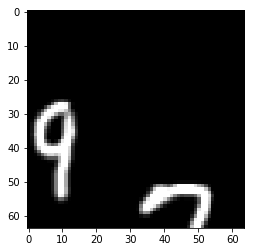

In [142]:
# Get data sample
obs = train_loader.__iter__().next()[0]
input_shape = obs[0].size()
obs_array = obs.numpy()
plt.imshow(obs_array[0][0], cmap="gray")

In [100]:
obs.size()

torch.Size([2, 1, 64, 64])

In [121]:
my_img = torchvision.transforms.ToPILImage()(obs_array[0][0])
results = torchvision.transforms.RandomResizedCrop(50)(my_img)
results_t = torchvision.transforms.ToTensor()(results)
#results.show()

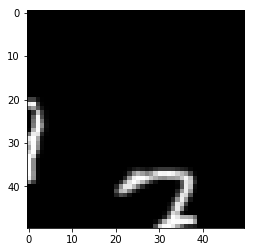

In [126]:
plt.imshow(results_t.numpy()[0], cmap="gray")